In [217]:
%load_ext autoreload
%autoreload 2

import parse_data.prepare_data as prepare_data
import parse_data.flip_rotate_trajectories as rotate
from analysis.response_times import calculate_response_times, plot_response_times
import data_extraction.get_indices as get_indices
import plotting.plot_octagon as plot_octagon
import globals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import analysis.loser_inferred_choice as loser_inferred_choice
import seaborn as sns
import data_strings
import data_extraction.trial_list_filters as trial_list_filters


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
data_folder = data_strings.DATA_FOLDER
json_filenames_all_social = data_strings.JSON_FILENAMES_SOCIAL
json_filenames_all_solo = data_strings.JSON_FILENAMES_SOLO

In [219]:
json_filenames = json_filenames_all_social

In [220]:
# prepare the session dataframe and dataframes of each individual trial
df, trial_lists = prepare_data.prepare_data(data_folder, json_filenames, combine=False)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fifth_experiments_241112\2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\sixth_experiments_241112\2024-11-12_15-23-24_Franc

In [221]:
# get_indices.get_trials_with_wall_sep(trial_list=trial_lists, wall_sep=1).size

In [222]:
## HEATMAPS ##

In [223]:
x_min = -20
x_max = 20
y_min = -20
y_max = 20

In [224]:
## sandbox for P(wall | first vis) heatmap
# first, write code to gather location counts data for one player
# Then, allow looping over all players so that location counts can be summed together, but still retain the data
# for individuals

# The cleanest way to do this will be to work with dataframes directly
# create a dictionary with nested dictionaries for session ids, which contain filtered lists of dataframes for each player
# be aware of the df trail number misaligning with the trial df index if I was looping instead 

# when I do global analysis, I just take this dictionary, and flatten it, concatenating all of the lists

In [225]:
solo = False

#### general analysis structure

In [226]:
# create dictionary to store filtered lists of dataframes for each player
filtered_data = {}
for session_id, trial_list in enumerate(trial_lists):
    # create the nested dictionary for session_id
    filtered_data[session_id] = {}

    player_ids = [0] if solo else [0,1]
    for player_id in player_ids:
        # do some filtering to this trial list for this player_id
        filtered_trial_list = []

        # append the filtered trial list to the dictionary
        filtered_data[session_id, player_id] = filtered_trial_list

#### filtering functions used to get P(H|H first vis) and P(H|L first vis) trials

In [227]:
# variables for filtering function
trial_list = trial_lists[1]
inferred_choice = True
current_fov =110
wall_visible_index=0
chosen_wall_index = 0

In [228]:
def heatmap_trial_list_filterer_denominator(trial_list, player_id, inferred_choice, current_fov, wall_visible_index,
                                            debug=False):    
    ''' Filter all trials where player has a retrievable choice, and saw the wall_visible_index wall first'''  

    print(f" trial list: {type(trial_list)}, length {len(trial_list)}")
    print(f"player_id: {type(player_id)}")
    # filter for retrievable choice, then where visible_wall_index becomes visible first, then where player chose High
    trial_list_filtered, original_indices = trial_list_filters.filter_trials_retrievable_choice(trial_list, player_id, inferred_choice, original_indices=None,
                                        debug=False)
    
    
    trial_list_filtered, original_indices = trial_list_filters.filter_trials_one_wall_becomes_visible_first(trial_list_filtered, player_id,
                                                    current_fov, wall_index=wall_visible_index,
                                                    original_indices=original_indices,
                                                    debug=False)

    return trial_list_filtered, original_indices


#### condition filtering applied to general structure

In [229]:
# create dictionary to store filtered lists of dataframes for each player
filtered_trials_denominator = {}
for session_id, trial_list in enumerate(trial_lists):
    # create the nested dictionary for session_id
    filtered_trials_denominator[session_id] = {}

    # filter trial list for specified trial type (e.g., HIGH_LOW)
    trial_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
    trial_list = [trial_list[i] for i in trial_indices]

    inferred_choice = False if solo else inferred_choice
    player_ids = [0] if solo else [0,1]
    for player_id in player_ids:
        # do some filtering to this trial list for this player_id
        trial_list_filtered, _ = heatmap_trial_list_filterer_denominator(trial_list, player_id, 
                                    inferred_choice, current_fov, wall_visible_index, debug=False)

        # append the filtered trial list to the dictionary
        print(session_id, player_id)
        filtered_trials_denominator[session_id][player_id] = trial_list_filtered

 trial list: <class 'list'>, length 102
player_id: <class 'int'>
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
And the number of valid trials at this step is 33
0 0
 trial list: <class 'list'>, length 102
player_id: <class 'int'>
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.]
And the number of valid trials at this step is 43
0 1
 trial list: <class 'list'>, length 79
playe

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:321: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
And the number of valid trials at this step is 12
1 0
 trial list: <class 'list'>, length 79
player_id: <class 'int'>
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0.]
And the number of valid trials at this step is 28
1 1
 trial list: <class 'list'>, length 93
player_id: <class 'int'>
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0

#### condition + choice filtering applied to general structure

In [230]:
# create dictionary to store filtered lists of dataframes for each player
filtered_trials_numerator = {}
for session_id, trial_list in enumerate(trial_lists):
    # create the nested dictionary for session_id
    filtered_trials_numerator[session_id] = {}

    # filter trial list for specified trial type (e.g., HIGH_LOW)
    trial_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
    trial_list = [trial_list[i] for i in trial_indices]

    inferred_choice = False if solo else inferred_choice
    player_ids = [0] if solo else [0,1]
    for player_id in player_ids:
        # do some filtering to this trial list for this player_id
        trial_list_filtered, _ = heatmap_trial_list_filterer_numerator(trial_list, player_id, 
                                    inferred_choice, current_fov, wall_visible_index,
                                    chosen_wall_index, debug=False)

        # append the filtered trial list to the dictionary
        print(session_id, player_id)
        filtered_trials_numerator[session_id][player_id] = trial_list_filtered

 trial list: <class 'list'>, length 102
player_id: <class 'int'>
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
And the number of valid trials at this step is 33
0 0
 trial list: <class 'list'>, length 102
player_id: <class 'int'>
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.]
And the number of valid trials at this step is 43
0 1
 trial list: <class 'list'>, length 79
playe

#### With the raw (filtered) trials, create an overall analysis dictionary

In [232]:
analysis_results = {
    session_id: {
        player_id: {

            # filtered, then flipped-and-rotated trial dataframes
            'filtered_trials': {
                'numerator': filtered_trials_numerator[session_id][player_id],
                'denominator': filtered_trials_denominator[session_id][player_id],
                'numerator_flipped_rotated': None,
                'denominator_flipped_rotated': None
            },

            # trial start positions
            'positions': {
                'positions_numerator': None,
                'positions_denominator': None,
            },

            # grids of count data per trial
            'grids': {
                'grid_numerator': None,
                'grid_denominator': None,
                'grid_ratio': None # ratio of numerator to denominator grids
            }
        }
        for player_id in filtered_trials_numerator[session_id]
    }
    for session_id in filtered_trials_numerator
}

#### flip and rotate filtered trials so that trial positions are comparable

In [234]:
# Directly alter the dictionary to store the flipped-rotated version of the trials
for session_id, players in analysis_results.items():
    for player_id, data in players.items():
        player_data = analysis_results[session_id][player_id]
        player_trials_numerator = data['filtered_trials']['numerator']
        player_data['filtered_trials']['numerator_flipped_rotated'] = [rotate.flip_rotate_trajectories(trial=trial) 
                                                            for trial in player_trials_numerator]
for session_id, players in analysis_results.items():
    for player_id, data in players.items():
        player_data = analysis_results[session_id][player_id]
        player_trials_denominator = data['filtered_trials']['denominator']
        player_data['filtered_trials']['denominator_flipped_rotated'] = [rotate.flip_rotate_trajectories(trial=trial) 
                                                            for trial in player_trials_denominator]

#### Store location at trial start for each trial in denominator and numerator trials

In [239]:
for session_id, players in analysis_results.items():
    for player_id, data in players.items():
        print(len(data['filtered_trials']['numerator'][6]))


388
440
396
457
482
689
389
432
521
485
493
374
510
450
520
478
509
473
575
403
536
395
346
457
480
438
525
464
366
381
400
342
401
378
468
500
428
416


In [270]:
# for each session id and then for each player id in the dictionary
# access the relevant player slice onset location and create a list entry in an identically structured dictionary
# storing these locations

for session_id, players in analysis_results.items():
    for player_id, data in players.items():
        player_data = analysis_results[session_id][player_id]
        player_trials_numerator = data['filtered_trials']['numerator_flipped_rotated']
        player_data['positions']['positions_numerator'] = np.array(
                                                        [get_indices.get_player_slice_onset_loc(trial, player_id) 
                                                         for trial in player_trials_numerator],
                                                        dtype=np.float32
                                                        )

        
for session_id, players in analysis_results.items():
    for player_id, data in players.items():
        player_data = analysis_results[session_id][player_id]
        player_trials_denominator = data['filtered_trials']['denominator_flipped_rotated']
        player_data['positions']['positions_denominator'] = np.array(
                                                        [get_indices.get_player_slice_onset_loc(trial, player_id)
                                                          for trial in player_trials_denominator],
                                                        dtype=np.float32
                                                        )

In [271]:
analysis_results[0][0]['positions']['positions_numerator']

array([[  6.68,  14.68],
       [  2.16,   7.24],
       [ -6.1 ,  -7.51],
       [-14.39,  -3.38],
       [ 14.49,   6.69],
       [  8.97,  -4.2 ],
       [ -1.03, -10.21],
       [ -8.21,   4.21],
       [ -4.41,  10.3 ],
       [ -1.09,   1.13],
       [  5.3 , -16.67],
       [ -1.78,   2.45],
       [  0.98,  -2.53],
       [  0.07,   0.11],
       [ -1.87,   2.49],
       [  1.77,  -3.12],
       [ -1.67,   1.69],
       [  7.05,  -2.02],
       [ -2.07,   5.24],
       [ -3.54,  -1.13],
       [ -0.24,   1.46],
       [ -0.68,  -0.17],
       [  1.56,  -3.58],
       [  1.28,  -3.61],
       [ -5.01,  12.77],
       [ -1.12,   9.44],
       [ -9.8 ,  10.61]], dtype=float32)

#### Sort slice onset locations into spatially-binned count arrays (function and logic)

In [272]:
def heatmap_counts_from_location_data(location_array, n_rows=10, n_cols=10, x_min=x_min, x_max=x_max, 
                                      y_min=y_min, y_max=y_max):
    ''' Produce a matrix of counts across spatial location from n*2 location data '''

    # define a grid of counts
    grid_width = (x_max - x_min)/n_cols
    grid_height = (y_max - y_min)/n_rows
    grid = np.zeros([n_rows, n_cols])

    # Create a matrix of heatmap counts based on which bin starting location fits into
    for i in range(len(location_array[:,0])):
        x_val = location_array[i,0]
        y_val = location_array[i,1]
        x_bin = int((x_val - x_min)/grid_width)
        y_bin = int((y_val - y_min)/grid_height)

        if 0 <= y_bin < n_rows and 0 <= x_bin < n_cols:
            grid[y_bin, x_bin] += 1

    return grid

In [273]:
n_rows = 8
n_cols = 8

In [274]:
# create new dictionaries to store a grid of slice-onset location count arrays 

for session_id, players in analysis_results.items():
    for player_id, data in players.items():
        player_data = analysis_results[session_id][player_id]
        location_array = player_data['positions']['positions_numerator']
        player_data['grids']['grid_numerator'] = heatmap_counts_from_location_data(location_array,n_rows=n_rows, n_cols=n_cols,
                                                                        x_min=x_min, x_max=x_max, 
                                                                        y_min=y_min, y_max=y_max)
for session_id, players in analysis_results.items():
    for player_id, data in players.items():
        player_data = analysis_results[session_id][player_id]
        location_array = player_data['positions']['positions_denominator']
        player_data['grids']['grid_denominator'] = heatmap_counts_from_location_data(location_array,n_rows=n_rows, n_cols=n_cols,
                                                                        x_min=x_min, x_max=x_max, 
                                                                        y_min=y_min, y_max=y_max)


#### Calculate numerator/denominator ratio for each bin

In [275]:
for session_id, players in analysis_results.items():
    for player_id, data in players.items():
        player_data = analysis_results[session_id][player_id]
        player_data['grids']['grid_ratio'] = player_data['grids']['grid_numerator']/player_data['grids']['grid_denominator']

C:\Users\Tom\AppData\Local\Temp\ipykernel_19028\2111596262.py:4: RuntimeWarning: invalid value encountered in divide
  player_data['grids']['grid_ratio'] = player_data['grids']['grid_numerator']/player_data['grids']['grid_denominator']


In [276]:
#### find the average grid across all data

In [277]:
numerator_array_list = [analysis_results[session_id][player_id]['grids']['grid_numerator']
 for session_id in analysis_results
 for player_id in analysis_results[session_id]
 ]
denominator_array_list = [analysis_results[session_id][player_id]['grids']['grid_denominator']
 for session_id in analysis_results
 for player_id in analysis_results[session_id]
 ]


In [290]:
raw_denominator_array_list = [analysis_results[session_id][player_id]['filtered_trials']['denominator_flipped_rotated']
 for session_id in analysis_results
 for player_id in analysis_results[session_id]
 ]

raw_denominator_array_list = [trial
                            for player in raw_denominator_array_list
                            for trial in player
]

In [293]:
type(raw_denominator_array_list[0])

pandas.core.frame.DataFrame

In [295]:
len(raw_denominator_array_list)

1248

In [298]:
raw_denominator_array_list_short = raw_denominator_array_list[:10]

In [ ]:
import pickle
import os
my_variable = raw_denominator_array_list_short
shared_path = os.path.join("..", "shared_data", "my_variable.pkl")
with open("my_variable.pkl", "wb") as f:
    pickle.dump(my_variable, f)

In [278]:
n = len(numerator_array_list)
summed_numerator = np.nansum(numerator_array_list, axis=0)
summed_denominator =  np.nansum(denominator_array_list, axis=0)
ratio_array_aggregate = summed_numerator/summed_denominator


C:\Users\Tom\AppData\Local\Temp\ipykernel_19028\3986122267.py:4: RuntimeWarning: invalid value encountered in divide
  ratio_array_aggregate = summed_numerator/summed_denominator


In [279]:
summed_denominator

array([[  0.,   0.,   0.,   5.,   1.,   1.,   0.,   0.],
       [  0.,   4.,   5.,   9.,  12.,   6.,  13.,   0.],
       [  1.,   8.,  12.,  40.,  37.,  14.,   5.,   1.],
       [  1.,   9.,  31., 167., 192.,  30.,   8.,   3.],
       [  6.,   7.,  33., 181., 170.,  46.,   8.,   4.],
       [  0.,   2.,   4.,  34.,  53.,  17.,  12.,   1.],
       [  1.,   2.,   4.,  10.,  11.,   9.,  14.,   0.],
       [  0.,   0.,   0.,   0.,   3.,   0.,   1.,   0.]])

In [280]:
np.set_printoptions(precision=2, suppress=True)  # Format numbers
ratio_array_aggregate

array([[ nan,  nan,  nan, 0.2 , 0.  , 1.  ,  nan,  nan],
       [ nan, 0.25, 0.6 , 0.78, 0.25, 0.5 , 0.38,  nan],
       [1.  , 0.88, 0.58, 0.78, 0.86, 0.5 , 0.6 , 1.  ],
       [0.  , 0.44, 0.87, 0.9 , 0.85, 0.67, 0.38, 1.  ],
       [0.67, 0.57, 0.76, 0.87, 0.91, 0.83, 0.88, 0.25],
       [ nan, 1.  , 0.25, 0.88, 0.92, 0.76, 0.75, 1.  ],
       [1.  , 1.  , 1.  , 0.7 , 0.91, 0.78, 0.64,  nan],
       [ nan,  nan,  nan,  nan, 1.  ,  nan, 1.  ,  nan]])

#### Use a cut-off for bins with fewer data-points

In [281]:
ratio_array_aggregate_data_size_cutoff = ratio_array_aggregate.copy()
ratio_array_aggregate_data_size_cutoff[summed_denominator < 7] = np.nan
ratio_array_aggregate_data_size_cutoff

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan, 0.78, 0.25,  nan, 0.38,  nan],
       [ nan, 0.88, 0.58, 0.78, 0.86, 0.5 ,  nan,  nan],
       [ nan, 0.44, 0.87, 0.9 , 0.85, 0.67, 0.38,  nan],
       [ nan, 0.57, 0.76, 0.87, 0.91, 0.83, 0.88,  nan],
       [ nan,  nan,  nan, 0.88, 0.92, 0.76, 0.75,  nan],
       [ nan,  nan,  nan, 0.7 , 0.91, 0.78, 0.64,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

In [282]:
probability_array_list = [analysis_results[session_id][player_id]['grids']['grid_ratio']
 for session_id in analysis_results
 for player_id in analysis_results[session_id]
 ]

#### plot P(H | H first vis/L first vis heatmap)

In [283]:
def plot_heatmap_from_count_array(ax, count_array, x_min=x_min, x_max=x_max, 
                                      y_min=y_min, y_max=y_max, vmin=None, vmax=None):

    # get the zipped coordinate list of octagon x and y vertex points
    octagon_vertex_coordinates = plot_octagon.return_octagon_path_points()

    if vmin is None:
        # display heatmap, covering the full graph
        im = ax.imshow(count_array, extent=[x_min, x_max, y_min, y_max],
                   origin='lower', cmap='plasma')

    else:
        # display heatmap, covering the full graph
        im = ax.imshow(count_array, extent=[x_min, x_max, y_min, y_max],
                   origin='lower', cmap='plasma', vmin=0, vmax=1)  
    
    # a matplotlib Artist with an edge and face colour
    patch = Polygon(octagon_vertex_coordinates, edgecolor='black', facecolor='none', lw=2)
    

    ax.add_patch(patch)         # make octagon outline visible
    im.set_clip_path(patch)     # crop image to coordinates inside the outline
    
    # Set aspect ratio to be square
    ax.set_aspect(1.)
    
    plt.colorbar(im)

    # ax.set_title("Count heatmap of winner location at the start of each trial")

    
    # give some white border to the graph
    ax.set_xlim([-22,22])
    ax.set_ylim([-22,22])


    print("total counts by location:\n", count_array)

    return ax

total counts by location:
 [[ nan  nan  nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan 0.78 0.25  nan 0.38  nan]
 [ nan 0.88 0.58 0.78 0.86 0.5   nan  nan]
 [ nan 0.44 0.87 0.9  0.85 0.67 0.38  nan]
 [ nan 0.57 0.76 0.87 0.91 0.83 0.88  nan]
 [ nan  nan  nan 0.88 0.92 0.76 0.75  nan]
 [ nan  nan  nan 0.7  0.91 0.78 0.64  nan]
 [ nan  nan  nan  nan  nan  nan  nan  nan]]


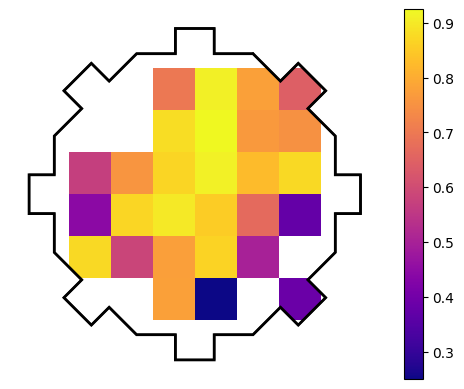

In [284]:
ax = plot_octagon.plot_octagon()
ax = plot_heatmap_from_count_array(ax, ratio_array_aggregate_data_size_cutoff)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

#### TODO:
- check logic to make sure we're selecting trials and flipping/rotating correctly (This can be done by using tests/flipped_rotated_trajectory_testing.ipynb on the flattened list of trials that are going into this current analysis)
- repeat for solo
- repeat for P(H|L first vis)